In [1]:
import sys
import os

In [8]:
sys.path.append('/home/aalvarez/Work/Projects/Elements/5.8/InstallArea/x86_64-fc31-gcc92-dbg/python/')
sys.path.append('/home/aalvarez/Work/Projects/Phosphoros/Phosphoros/InstallArea/x86_64-fc31-gcc92-dbg/python/')

In [9]:
from astropy.table import Table
from PhzCLI.PlotSpecZComparison import SpeczPhotozPlot, displayHistogram, compute_stats
import matplotlib.pyplot as plt
import numpy as np

# Compare runs

In [10]:
not_shifted = Table.read('/home/aalvarez/Work/Data/WillHartley/RUN_not_shifted.fits', hdu=1)
not_corrected = Table.read('/home/aalvarez/Work/Data/WillHartley/RUN_not_corrected.fits', hdu=1)
corrected = Table.read('/home/aalvarez/Work/Data/WillHartley/RUN_corrected.fits', hdu=1)

In [11]:
_ = compute_stats(not_shifted['z'], not_shifted['REDSHIFT_MEDIAN'])

--> Mean                :  0.02140114
--> Median              :  0.007366202
--> Sigma               :  0.13568898
--> Mad                 :  0.017919742
--> Outliers            :  3.17 %
--> Sigma (no outliers) :  0.027816936


In [12]:
_ = compute_stats(not_corrected['z'], not_corrected['REDSHIFT_MEDIAN'])

--> Mean                :  0.019718656
--> Median              :  0.0043965066
--> Sigma               :  0.148289
--> Mad                 :  0.018336223
--> Outliers            :  3.19 %
--> Sigma (no outliers) :  0.027483132


In [13]:
_ = compute_stats(corrected['z'], corrected['REDSHIFT_MEDIAN'])

--> Mean                :  0.022151997
--> Median              :  0.0070244763
--> Sigma               :  0.14852744
--> Mad                 :  0.018029483
--> Outliers            :  3.13 %
--> Sigma (no outliers) :  0.027657218


In [14]:
edges = np.histogram_bin_edges(not_shifted['Mag_vis'], bins=10)
centers = (edges[1:] + edges[:-1])/2
bins = np.digitize(not_shifted['Mag_vis'], bins=edges)

In [15]:
err = not_shifted['REDSHIFT_MODE'] - not_shifted['z']
median_err = []
q1_err = []
q3_err = []
data = []
for b in np.arange(1, 1+len(centers)):
    data.append(err[bins==b])
    q1, m, q3 = np.quantile(err[bins==b], [0.25, 0.5, 0.75])
    q1_err.append(q1)
    median_err.append(m)
    q3_err.append(q3)
q1_err = np.array(q1_err)
median_err = np.array(median_err)
q3_err = np.array(q3_err)

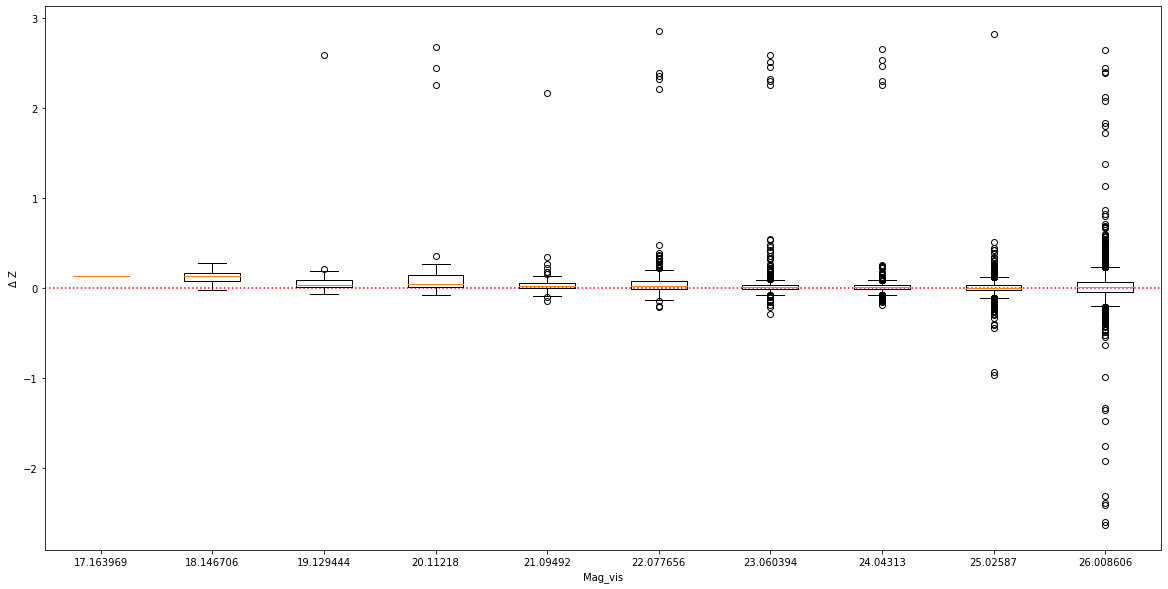

In [16]:
plt.figure(figsize=(20,10))
plt.boxplot(data, labels=centers)
plt.hlines(0, 0.5, 10.5, linestyle=':', color='r')
plt.xlabel('Mag_vis')
plt.ylabel('$\Delta$ Z')
plt.show()